In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

%matplotlib inline

In [4]:
df = pd.read_csv('D600 Task 1 Dataset 1 Housing Information.csv')

In [5]:
df.head()

,ID,Price,SquareFootage,NumBathrooms,NumBedrooms,BackyardSpace,CrimeRate,SchoolRating,AgeOfHome,DistanceToCityCenter,...,RenovationQuality,LocalAmenities,TransportAccess,Fireplace,HouseColor,Garage,Floors,Windows,PreviousSalePrice,IsLuxury
0,4922,255614.8992,566.62,1.000000,4,779.42,20.56,5.62,39.46,10.08,...,4.93,4.44,4.55,Yes,Blue,No,1,13,181861.54230,0
1,5009,155586.0947,1472.34,1.000000,2,656.13,15.62,5.63,40.51,7.89,...,4.08,5.56,6.83,No,Green,No,1,17,50042.59757,0
2,4450,131050.8324,550.00,1.779354,3,754.57,12.47,9.20,48.38,23.74,...,4.26,8.07,8.48,Yes,Green,Yes,2,34,48400.34440,0
3,1070,151361.7125,941.81,2.035254,2,439.59,22.22,7.08,94.67,5.22,...,4.45,5.00,6.27,Yes,Red,No,1,14,84594.12145,0
4,400,113167.6128,550.00,1.064644,3,353.03,8.28,5.93,16.80,43.13,...,3.36,5.46,6.99,No,White,Yes,1,21,22934.59654,0


In [6]:
#C1 - Identify the Dependent and Independent Variables
dependent_variable = 'Price'
independent_variables = ['CrimeRate', 'SchoolRating', 'DistanceToCityCenter', 'EmploymentRate', 'LocalAmenities', 'TransportAccess']

selected_columns = [dependent_variable] + independent_variables
df_selected = df[selected_columns]

print(f"Dependent Variable: {dependent_variable}\nIndependent Variables: {independent_variables}")

Dependent Variable: Price
Independent Variables: ['CrimeRate', 'SchoolRating', 'DistanceToCityCenter', 'EmploymentRate', 'LocalAmenities', 'TransportAccess']


In [7]:
#C2 - Descriptive Statistics for Dependent and Independent Variables
df_selected.describe()

,Price,CrimeRate,SchoolRating,DistanceToCityCenter,EmploymentRate,LocalAmenities,TransportAccess
count,7.000000e+03,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,3.072820e+05,31.226194,6.942923,17.475337,93.711349,5.934579,5.983860
std,1.501734e+05,18.025327,1.888148,12.024985,4.505359,2.657930,1.953974
min,8.500000e+04,0.030000,0.220000,0.000000,72.050000,0.000000,0.010000
25%,1.921075e+05,17.390000,5.650000,7.827500,90.620000,4.000000,4.680000
50%,2.793230e+05,30.385000,7.010000,15.625000,94.010000,6.040000,6.000000
75%,3.918781e+05,43.670000,8.360000,25.222500,97.410000,8.050000,7.350000
max,1.046676e+06,99.730000,10.000000,65.200000,99.900000,10.000000,10.000000


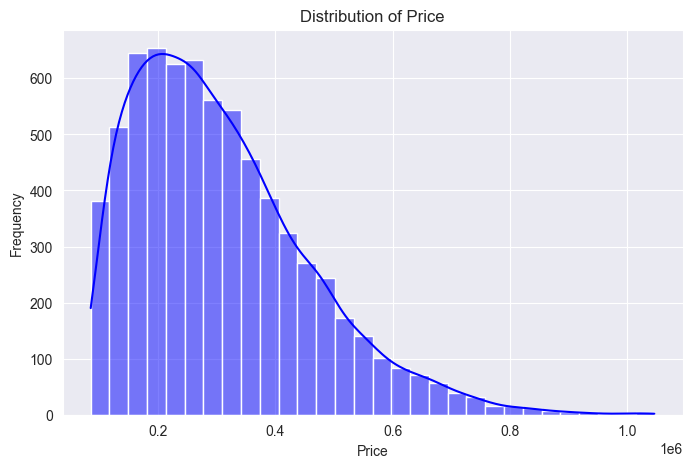

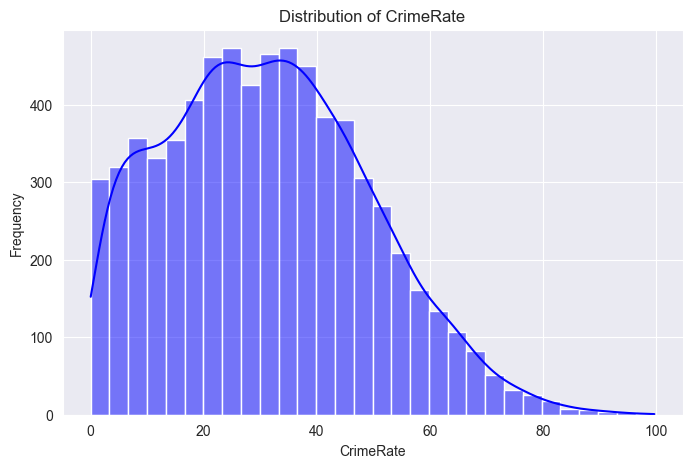

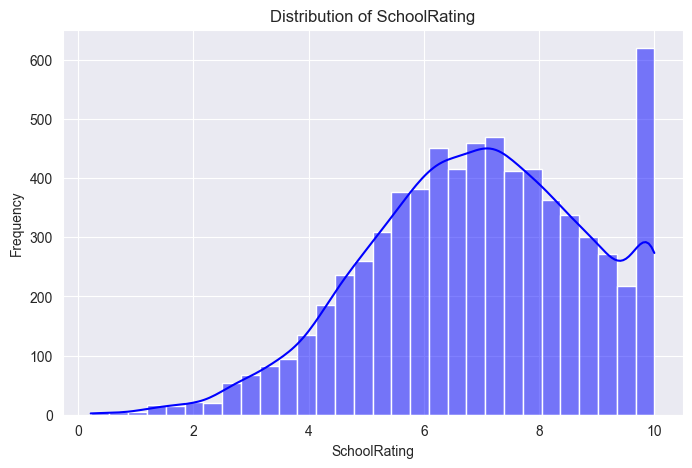

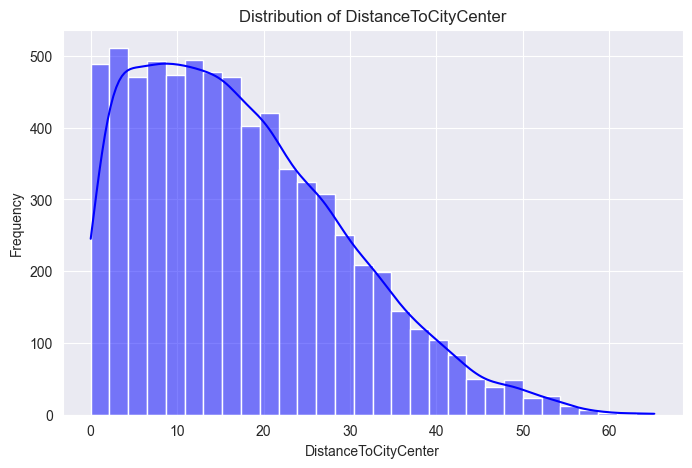

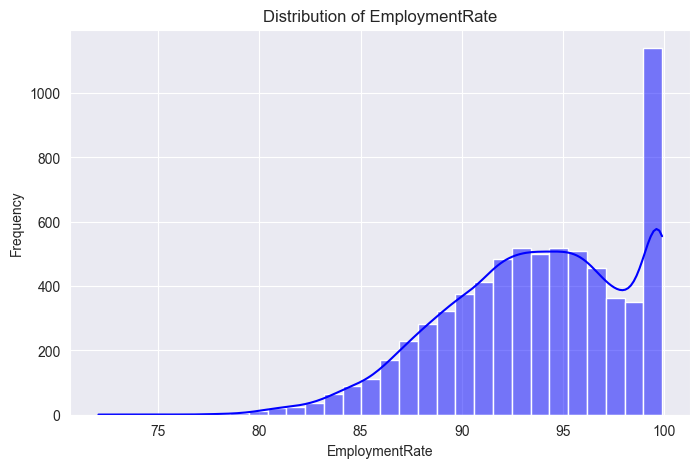

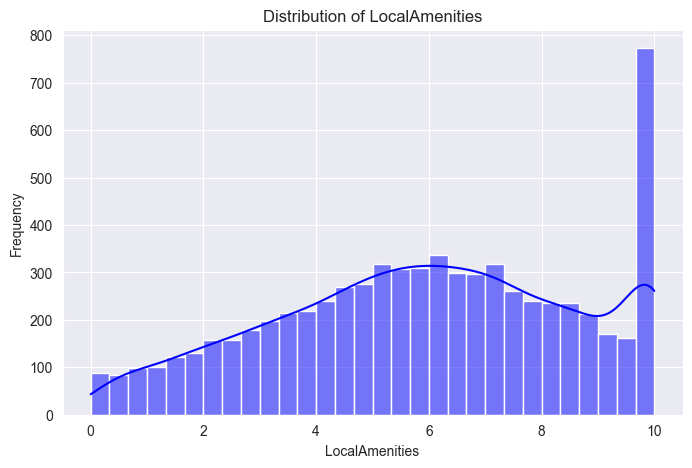

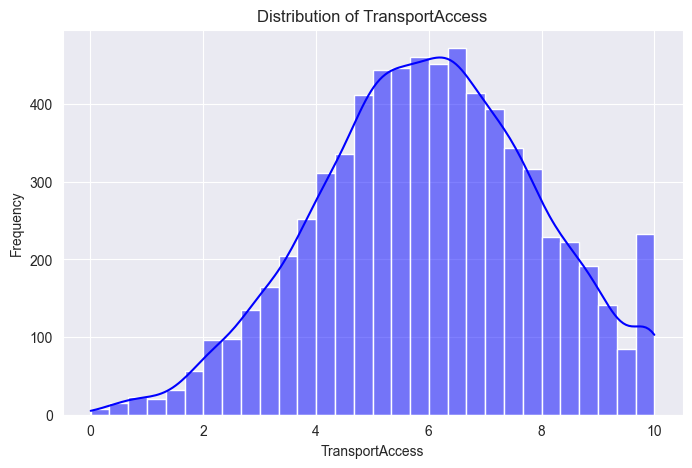

In [8]:
#C3 - Univariate Visualization for Dependent and Independent Variables (Histograms)
for col in selected_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df_selected[col], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

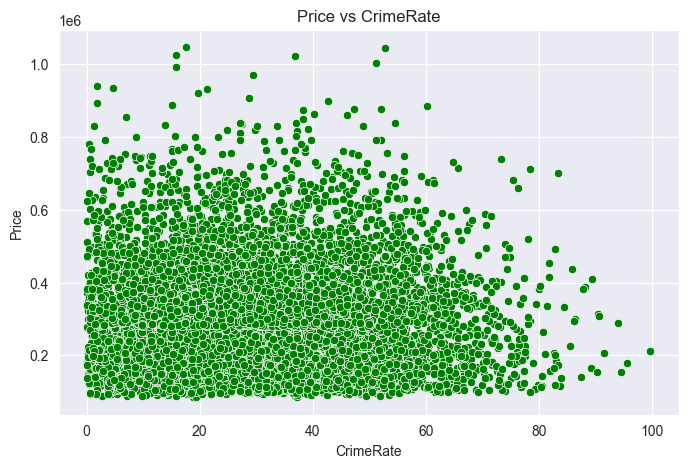

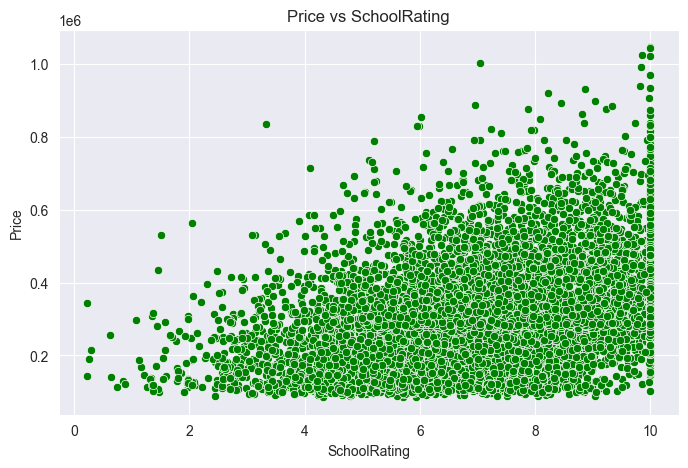

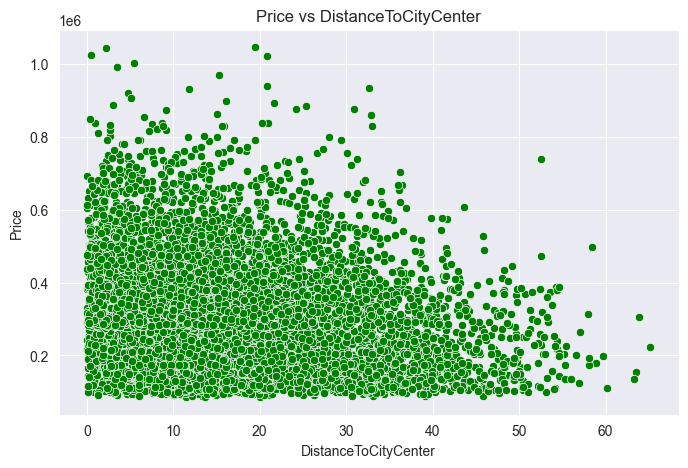

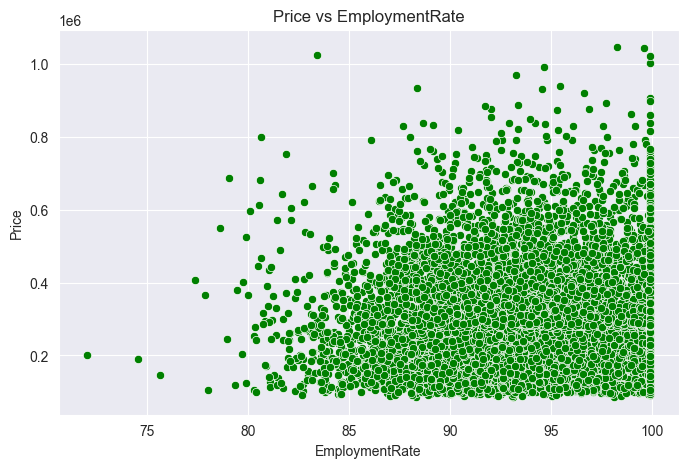

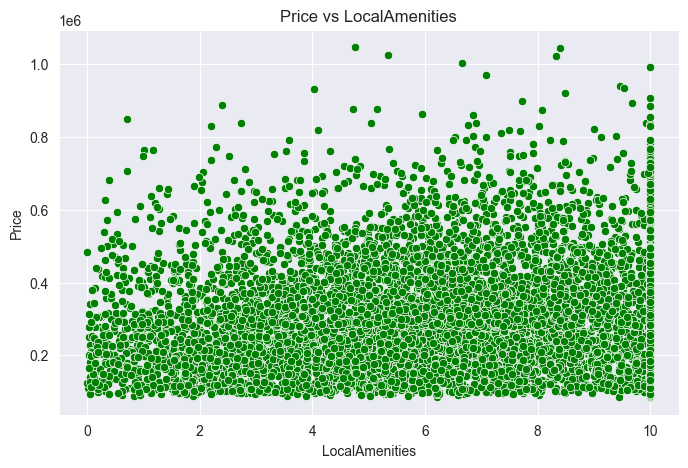

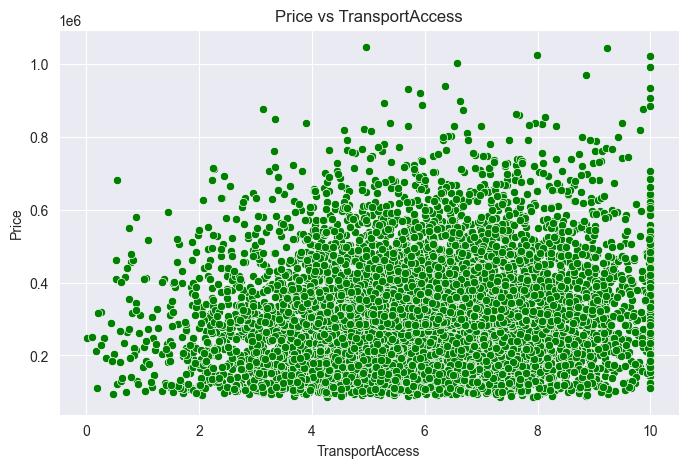

In [9]:
#C3 - Bivariate Visualization for Dependent and Independent Variables (Scatterplots)
for col in independent_variables:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=df_selected, x=col, y=dependent_variable, color='green')
    plt.title(f'{dependent_variable} vs {col}')
    plt.xlabel(col)
    plt.ylabel(dependent_variable)
    plt.show()

In [10]:
#D1 - Split the Dataset into two datasets - only include the selected variables
train_ratio = 0.8

# Split the data
train_data, test_data = train_test_split(df_selected, test_size=1-train_ratio, random_state=42)

# Export the datasets to CSV files
train_data.to_csv('training_dataset.csv', index=False)
test_data.to_csv('test_dataset.csv', index=False)

In [11]:
#D2 - Initial Linear Regression Model
X_train = train_data[independent_variables]
y_train = train_data[dependent_variable]

# Add a constant term for the intercept
X_train = sm.add_constant(X_train)

# Build the initial regression model
model = sm.OLS(y_train, X_train).fit()

# Display the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.182
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     207.1
Date:                Mon, 20 Jan 2025   Prob (F-statistic):          2.58e-239
Time:                        22:40:27   Log-Likelihood:                -74176.
No. Observations:                5600   AIC:                         1.484e+05
Df Residuals:                    5593   BIC:                         1.484e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 8.321e+04 

In [12]:
#D2 - Optimization: Using Backward Elimination
def backward_elimination(X, y, significance_level=0.05):
    X = sm.add_constant(X)
    while True:
        model = sm.OLS(y, X).fit()
        max_p_value = model.pvalues.max()
        if max_p_value > significance_level:
            excluded_feature = model.pvalues.idxmax()
            print(f"Dropping '{excluded_feature}' with p-value {max_p_value}")
            X = X.drop(columns=[excluded_feature])
        else:
            break
    return model

# Perform backward elimination
optimized_model = backward_elimination(X_train, y_train)

# Display the summary of the optimized model
print(optimized_model.summary())

Dropping 'EmploymentRate' with p-value 0.8794374449160701
Dropping 'CrimeRate' with p-value 0.07605604867751349
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.181
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     309.8
Date:                Mon, 20 Jan 2025   Prob (F-statistic):          4.04e-241
Time:                        22:41:08   Log-Likelihood:                -74177.
No. Observations:                5600   AIC:                         1.484e+05
Df Residuals:                    5595   BIC:                         1.484e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
---------

In [13]:
#D2 - Extracting Key Metrics
r_squared = optimized_model.rsquared
adjusted_r_squared = optimized_model.rsquared_adj
f_stat = optimized_model.fvalue
prob_f_stat = optimized_model.f_pvalue
coefficients = optimized_model.params
p_values = optimized_model.pvalues

# Print the metrics
print(f"R-squared: {r_squared}")
print(f"Adjusted R-squared: {adjusted_r_squared}")
print(f"F-statistic: {f_stat}, Probability F-statistic: {prob_f_stat}")
print("Coefficients:")
print(coefficients)
print("P-values:")
print(p_values)

R-squared: 0.18134485827822155
Adjusted R-squared: 0.1807595820374911
F-statistic: 309.84489999437136, Probability F-statistic: 4.0379490172988736e-241
Coefficients:
const                   96771.913572
SchoolRating            27705.252438
DistanceToCityCenter    -1709.895750
LocalAmenities           4056.430725
TransportAccess          4245.198821
dtype: float64
P-values:
const                    1.469824e-24
SchoolRating            1.292446e-159
DistanceToCityCenter     3.409922e-28
LocalAmenities           3.382661e-07
TransportAccess          7.810296e-05
dtype: float64


In [14]:
#D3 - Give the Mean Squared Error (MSE) of the Optimized Model Using the Training Set
X_train_optimized = X_train[['const', 'SchoolRating', 'DistanceToCityCenter', 'LocalAmenities', 'TransportAccess']]
y_train_pred = optimized_model.predict(X_train_optimized)

# Calculate Mean Squared Error (MSE)
mse_train = mean_squared_error(y_train, y_train_pred)

# Display the MSE
print(f"Mean Squared Error (MSE) on Training Set: {mse_train}")

Mean Squared Error (MSE) on Training Set: 18741162720.29868


In [15]:
#D4 - Run the Prediction on the Test Dataset using the Optimized Regression Model
X_test = test_data[['SchoolRating', 'DistanceToCityCenter', 'LocalAmenities', 'TransportAccess']]
X_test = sm.add_constant(X_test)  # Add constant for intercept
y_test = test_data[dependent_variable]

# Predict on the test set
y_test_pred = optimized_model.predict(X_test)

# Calculate Mean Squared Error (MSE) on the test set
mse_test = mean_squared_error(y_test, y_test_pred)

# Display the MSE
print(f"Mean Squared Error (MSE) on Test Set: {mse_test}")

Mean Squared Error (MSE) on Test Set: 17196763539.014236
